In [97]:
import pandas as pd
import xlrd

xls = pd.ExcelFile(r"WeatherData.xls")
df = xls.parse(0)

display(df)
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Region1,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Region1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Region1,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Region1,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Region1,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36524,2017-06-21,Region12,8.6,18.6,0.2,SSW,56.0,NNW,S,13.0,...,69.0,67.0,1025.7,1025.3,2.0,2.0,13.3,17.7,No,No
36525,2017-06-22,Region12,9.5,17.8,0.2,SW,35.0,NNW,SSE,9.0,...,74.0,70.0,1028.3,1024.6,2.0,2.0,14.3,16.8,No,No
36526,2017-06-23,Region12,8.7,19.4,0.0,NNW,30.0,NW,NW,13.0,...,83.0,57.0,1020.8,1014.7,6.0,6.0,10.9,18.2,No,No
36527,2017-06-24,Region12,9.4,19.9,0.0,SW,43.0,WNW,W,22.0,...,61.0,41.0,1017.3,1015.2,5.0,2.0,12.9,19.3,No,No


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,36029.000000,36160.000000,35839.000000,31597.000000,35698.000000,35054.000000,35862.000000,35196.000000,29837.000000,29846.000000,20712.000000,20390.000000,36092.000000,35424.000000
mean,13.413489,23.956333,2.696772,38.360287,12.662978,17.413904,70.032820,52.508581,1018.259165,1015.698485,4.312331,4.401422,17.861931,22.478128
std,5.723398,5.914569,9.410816,13.706660,9.126107,9.316727,17.508474,20.387986,6.648539,6.597083,2.913795,2.703880,5.290466,5.750985
min,-4.800000,6.800000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000
25%,9.200000,19.500000,0.000000,30.000000,6.000000,11.000000,58.000000,37.000000,1013.800000,1011.300000,1.000000,2.000000,14.100000,18.200000
50%,14.000000,23.400000,0.000000,37.000000,11.000000,17.000000,71.000000,53.000000,1018.300000,1015.800000,5.000000,5.000000,18.300000,21.800000
75%,18.000000,27.500000,0.800000,46.000000,19.000000,22.000000,83.000000,67.000000,1022.700000,1020.200000,7.000000,7.000000,21.800000,25.900000
max,29.700000,47.300000,371.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1037.000000,9.000000,8.000000,37.700000,46.700000


<AxesSubplot: >

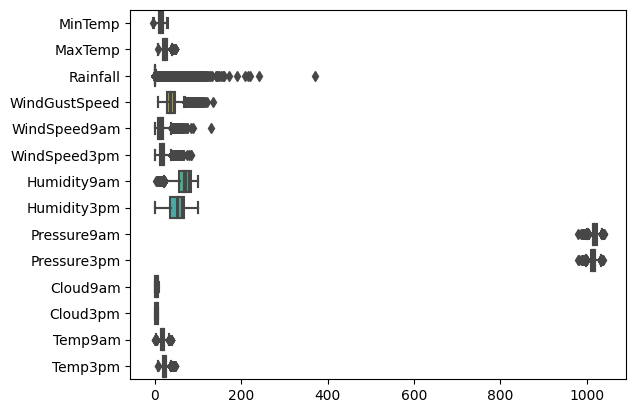

In [98]:
#Remove Outliers
# IQR
import seaborn as sns
sns.boxplot(data=df, orient="h")
def remove_outliers(df, columns, multiplier=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df
outlier_columns=['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Temp9am','Temp3pm','Pressure3pm']
df=remove_outliers(df,outlier_columns)
sns.boxplot(data=df, orient="h")

In [99]:


#Changing Rain Tommorow and Today to Binary
df["RainTomorrow"].replace(['No', 'Yes'],[0, 1], inplace=True)
df["RainToday"].replace(['No', 'Yes'],[0, 1], inplace=True)
df["Location"].replace(["Region1","Region2","Region3","Region4","Region5","Region6","Region7","Region8","Region9","Region10","Region11","Region12"]
                       ,[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20868.000000,20852.000000,20855.000000,20868.000000,11955.000000,12264.000000,20868.000000,20868.000000,20868.000000,20751.000000
mean,6.105041,12.722197,23.920203,0.133084,36.289103,12.683439,17.226184,67.094882,49.404949,1019.139218,1016.379572,3.927478,4.100130,17.606613,22.509114,0.043703,0.156233
std,3.673277,5.957577,5.659055,0.346859,11.096955,7.998019,7.849517,16.391015,18.993847,6.140921,6.071203,2.858233,2.686887,5.321813,5.468851,0.204439,0.363085
min,1.000000,-3.300000,7.800000,0.000000,7.000000,0.000000,0.000000,22.000000,1.000000,998.300000,999.800000,0.000000,0.000000,1.900000,6.700000,0.000000,0.000000
25%,3.000000,8.200000,19.600000,0.000000,28.000000,7.000000,11.000000,56.000000,35.000000,1015.000000,1012.200000,1.000000,1.000000,13.800000,18.400000,0.000000,0.000000
50%,5.000000,13.300000,23.600000,0.000000,35.000000,13.000000,17.000000,67.000000,50.000000,1019.100000,1016.400000,4.000000,4.000000,18.200000,22.000000,0.000000,0.000000
75%,10.000000,17.600000,27.600000,0.000000,44.000000,19.000000,22.000000,79.000000,63.000000,1023.300000,1020.500000,7.000000,7.000000,21.700000,26.000000,0.000000,0.000000
max,12.000000,28.100000,39.400000,1.900000,67.000000,37.000000,37.000000,100.000000,100.000000,1037.300000,1032.900000,8.000000,8.000000,33.200000,37.800000,1.000000,1.000000


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0.0
1,2008-12-02,1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,0.0
2,2008-12-03,1,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0.0
3,2008-12-04,1,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,0.0
4,2008-12-05,1,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36524,2017-06-21,12,8.6,18.6,0.2,SSW,56.0,NNW,S,13.0,...,69.0,67.0,1025.7,1025.3,2.0,2.0,13.3,17.7,0,0.0
36525,2017-06-22,12,9.5,17.8,0.2,SW,35.0,NNW,SSE,9.0,...,74.0,70.0,1028.3,1024.6,2.0,2.0,14.3,16.8,0,0.0
36526,2017-06-23,12,8.7,19.4,0.0,NNW,30.0,NW,NW,13.0,...,83.0,57.0,1020.8,1014.7,6.0,6.0,10.9,18.2,0,0.0
36527,2017-06-24,12,9.4,19.9,0.0,SW,43.0,WNW,W,22.0,...,61.0,41.0,1017.3,1015.2,5.0,2.0,12.9,19.3,0,0.0


<AxesSubplot: >

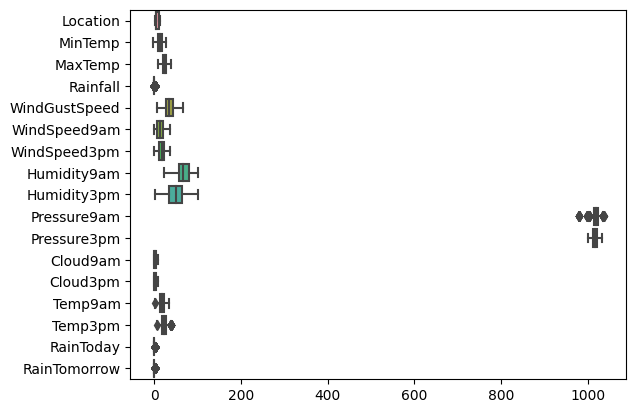

In [100]:
#Adding Constants(min value) instead of Null Values for Numeric Columns
#Dropping Rows with Null Categorical Value

values={"RainToday":0,"RainTomorrow":0,"MinTemp":-4.8,"MaxTemp":6.8,"Temp9am":0.3,"Temp3pm":6.4,"Cloud9am": 0,"Cloud3pm": 0,"Rainfall": 2.696772,"WindGustSpeed": 7,"WindSpeed9am":0,"WindSpeed3pm":0,"Pressure9am": 980.0,"Pressure3pm": 980.0,'Humidity9am': 1,'Humidity3pm': 1}
df.fillna(value=values,inplace=True)
#df.dropna(subset=["RainTomorrow"],inplace=True)
df.describe()
display(df)
sns.boxplot(data=df, orient="h") 


In [101]:
#Feature Scaling


from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer

columns_for_scaling=['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm']

scaler = StandardScaler().set_output(transform="pandas")



In [102]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.feature_selection import SelectKBest, mutual_info_classif

feature_cols=['RainToday','MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed3pm','Humidity3pm','Pressure3pm','Cloud3pm','Temp3pm']
X=df[feature_cols]
Y=df['RainTomorrow']
X_train, X_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=1)

X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)  

selector = SelectKBest(mutual_info_classif, k=7)
X_new = selector.fit_transform(X_train, y_train)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

X=df[selected_features]
Y=df['RainTomorrow']
X_train, X_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=1)

X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)  


Selected features: Index(['MinTemp', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity3pm',
       'Pressure3pm', 'Cloud3pm', 'Temp3pm'],
      dtype='object')


In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

max_depth_list = [3, 5, 7, 9, 11, 13, 15]

# Initialize a list to store the accuracy scores
accuracy_scores = []

# Iterate through each max_depth value
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train,y_train)
    
    # Evaluate the model on the validation set
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    
    # Store the accuracy score
    accuracy_scores.append(accuracy)

# Find the max_depth value with the highest accuracy score
best_max_depth = max_depth_list[accuracy_scores.index(max(accuracy_scores))]

data = {'Max Depth': max_depth_list, 'Accuracy Score': accuracy_scores}
dfMaxDepth = pd.DataFrame(data)
display(dfMaxDepth)


,Max Depth,Accuracy Score
0,3,0.877336
1,5,0.868711
2,7,0.869190
3,9,0.866315
4,11,0.862003
5,13,0.850024
6,15,0.834212


In [121]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
import math
model = DecisionTreeClassifier(max_depth=best_max_depth)
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred = model.predict(X_test)
#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test,y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test,y_pred)))
print("R Squared: ", r2_score(y_test,y_pred))

0.8811691423095352
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.93      1771
         1.0       0.78      0.30      0.43       316

    accuracy                           0.88      2087
   macro avg       0.84      0.64      0.68      2087
weighted avg       0.87      0.88      0.86      2087

RMSE: 0.3447185195060816
R Squared:  0.07515599425340758


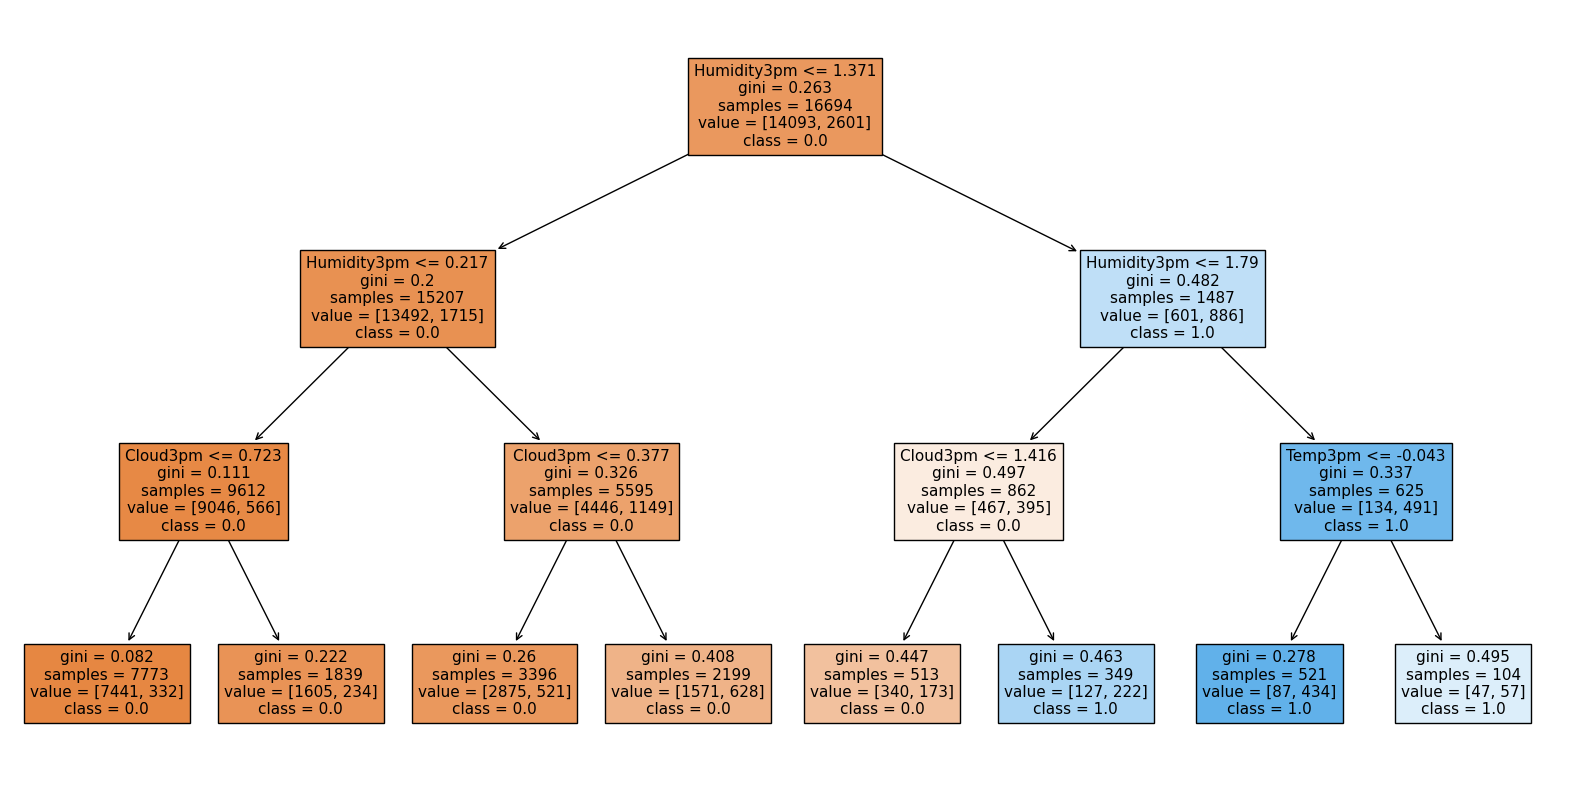

<Figure size 640x480 with 0 Axes>

In [105]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(model, filled=True, feature_names=X_train.columns, class_names=y_train.unique().astype(str))
plt.show()
plt.savefig("WeatherDecisionTree.png")

In [106]:
#Logistic Regression
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
logisticRegression = LogisticRegression(max_iter=150)
logisticRegression.fit(X_train, y_train)
logisticPredictions = logisticRegression.predict(X_test)

#evaluate the model
print(classification_report(y_test,logisticPredictions))
print("RMSE:",sqrt(mean_squared_error(y_test,logisticPredictions)))
print("R Squared: ", r2_score(y_test,logisticPredictions))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      1771
         1.0       0.70      0.32      0.44       316

    accuracy                           0.88      2087
   macro avg       0.79      0.65      0.69      2087
weighted avg       0.86      0.88      0.86      2087

RMSE: 0.35159980735606533
R Squared:  0.0378638972474965


(0.0, 1.0)

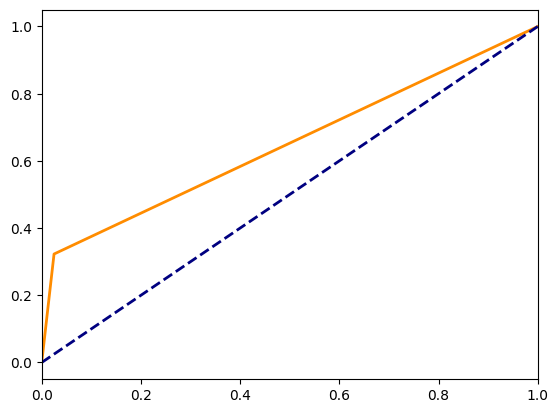

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

fpr, tpr, thresholds = roc_curve(y_test, logisticPredictions)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])

In [108]:
#Neural Network
import numpy as np
from math import sqrt
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score
neuralNetwork = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(12,), random_state=1,max_iter=1000)
neuralNetwork.fit(X_train, y_train)

NNPredictions = neuralNetwork.predict(X_test)
print(classification_report(y_test,NNPredictions))
print("RMSE",sqrt(mean_squared_error(y_test,NNPredictions)))
print("R Squared: ", r2_score(y_test,NNPredictions))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      1771
         1.0       0.71      0.37      0.48       316

    accuracy                           0.88      2087
   macro avg       0.80      0.67      0.71      2087
weighted avg       0.87      0.88      0.87      2087

RMSE 0.3440228204730451
R Squared:  0.07888520395399867


(0.0, 1.0)

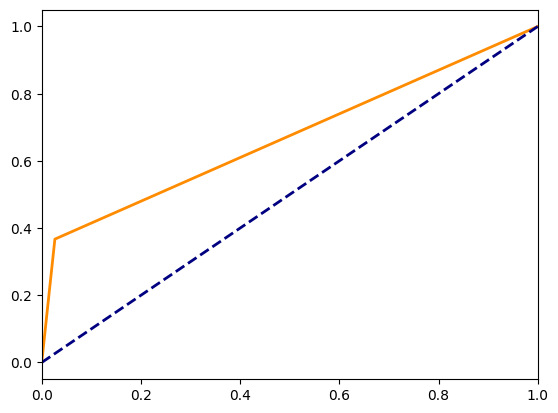

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

fpr, tpr, thresholds = roc_curve(y_test, NNPredictions)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])

/home/datablock/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.95      0.55      0.70     17626
         1.0       0.26      0.84      0.39      3242

    accuracy                           0.60     20868
   macro avg       0.60      0.70      0.55     20868
weighted avg       0.84      0.60      0.65     20868

RMSE:  0.634867948971895
R Squared:  -2.071578964757701


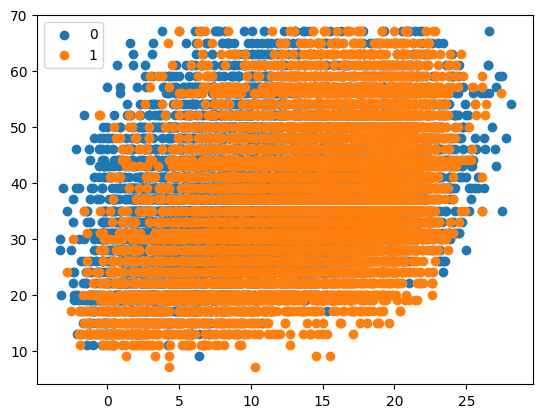

In [110]:
# K Means Clustering
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
kData=df[selected_features].to_numpy()


kmeans = KMeans(n_clusters=2)


# Fit the model to the data
kmeans.fit(kData)

# Predict the cluster labels for each sample
labels = kmeans.predict(kData)
print(classification_report(df['RainTomorrow'],labels))
print("RMSE: ",sqrt(mean_squared_error(df['RainTomorrow'],labels)))
print("R Squared: ", r2_score(df['RainTomorrow'],labels))

#Getting unique labels
 
u_labels = np.unique(labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(kData[labels == i , 0] , kData[labels == i , 1] , label = i)
plt.legend()
plt.show()

(0.0, 1.0)

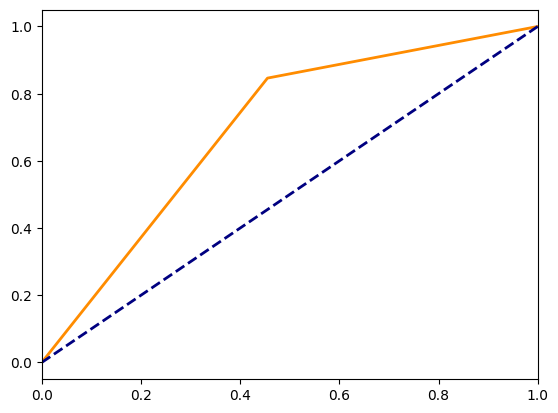

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

fpr, tpr, thresholds = roc_curve(df['RainTomorrow'], labels)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])

In [115]:
# SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

svm = SVC(kernel="rbf", C=10,gamma=0.1)
svm.fit(X_train,y_train)

svmPredictions = svm.predict(X_test)
print(classification_report(y_test,svmPredictions))
print("RMSE:" ,sqrt(mean_squared_error(y_test,svmPredictions)))
print("R Squared: ", r2_score(y_test,svmPredictions))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      1771
         1.0       0.84      0.29      0.43       316

    accuracy                           0.88      2087
   macro avg       0.86      0.64      0.68      2087
weighted avg       0.88      0.88      0.86      2087

RMSE: 0.3405230059556187
R Squared:  0.09753125245695415


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


(0.0, 1.0)

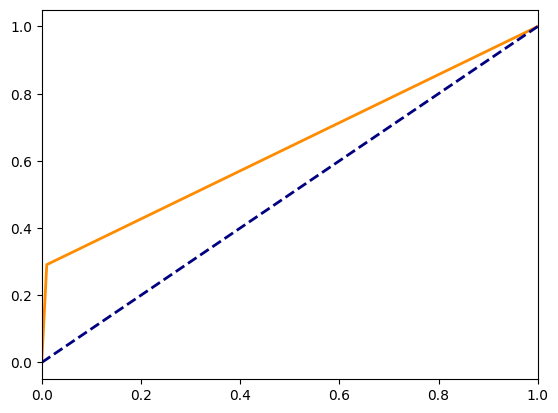

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

fpr, tpr, thresholds = roc_curve(y_test, svmPredictions)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])